In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/movies/train.csv')

In [3]:
df = pd.concat([df, df.genre.str.get_dummies()], axis=1)

In [4]:
df = pd.concat([df, df.cast.str.split('|',expand=True).rename(columns={0:'cast_1', 1:'cast_2', 2:'cast_3', 3:'cast_4', 4:'cast_5'})], axis=1)

In [5]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,cast_1,cast_2,cast_3,cast_4,cast_5
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Burt Lancaster,Audrey Hepburn,Audie Murphy,John Saxon,Lillian Gish
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Peter Cushing,Martita Hunt,Yvonne Monlaur,Freda Jackson,David Peel
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kenneth More,Dana Wynter,Carl MÃ¶hner,Laurence Naismith,Geoffrey Keen
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kenneth Connor,Charles Hawtrey,Sid James,Kenneth Williams,Leslie Phillips
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Randolph Scott,Nancy Gates,Skip Homeier,Dyke Johnson,Foster Hood


In [6]:
df.release_date = pd.to_datetime(df.release_date)

In [7]:
actors = df[df.release_date > '2000-01-01'].groupby('cast_1').revenue.sum().sort_values(ascending=False).index.to_list()

In [8]:
pd.Series(actors).head(20)

0      Daniel Radcliffe
1           Johnny Depp
2           Ben Stiller
3            Tom Cruise
4             Tom Hanks
5           Elijah Wood
6       Kristen Stewart
7            Will Smith
8            Mike Myers
9     Robert Downey Jr.
10      Sam Worthington
11         Shia LaBeouf
12       Christian Bale
13         Nicolas Cage
14        Tobey Maguire
15       George Clooney
16    Leonardo DiCaprio
17         Daniel Craig
18         Adam Sandler
19           Jim Carrey
dtype: object

In [9]:
actors[0:30]

['Daniel Radcliffe',
 'Johnny Depp',
 'Ben Stiller',
 'Tom Cruise',
 'Tom Hanks',
 'Elijah Wood',
 'Kristen Stewart',
 'Will Smith',
 'Mike Myers',
 'Robert Downey Jr.',
 'Sam Worthington',
 'Shia LaBeouf',
 'Christian Bale',
 'Nicolas Cage',
 'Tobey Maguire',
 'George Clooney',
 'Leonardo DiCaprio',
 'Daniel Craig',
 'Adam Sandler',
 'Jim Carrey',
 'Denzel Washington',
 'Ewan McGregor',
 'Keanu Reeves',
 'Ray Romano',
 'Matt Damon',
 'Russell Crowe',
 'Angelina Jolie',
 'Hugh Jackman',
 'Bruce Willis',
 'Mark Wahlberg']

In [10]:
df.cast = df.cast.str.split('|')

In [11]:
def f(row):
    if row.cast_1 in actors[:30]:
        val = row.cast_1
    else:
        val = 'Other'
    return val

In [12]:
df['cast_b'] = df.apply(f, axis = 1)

In [13]:
df.drop(['cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5'], axis=1, inplace=True)

In [14]:
df = pd.concat([df, df.cast_b.str.get_dummies()], axis=1)

In [15]:
df.drop('cast_b', axis=1, inplace=True)

In [16]:
new_cols = df.iloc[:, -51:]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
X = pd.concat([df[['budget', 'popularity']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.5378650831705111

In [18]:
df.set_index('release_date', inplace=True)

In [19]:
df['season'] = df.index.quarter

In [20]:
df['season'] = df['season'].map({
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Fall'
})

In [21]:
df = pd.concat([df.drop('season', axis=1),pd.get_dummies(df.season)], axis=1)

In [22]:
df.head(2)

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-01-01,1,0.333643,0,The Brides of Dracula,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
new_cols = df.iloc[:, -55:]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-02-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-02-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X = pd.concat([df[['budget', 'popularity']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.5404648562246793

In [25]:
df['prod'] = df.production_companies.str.split('|',expand=True).loc[:,1]

In [26]:
df.head(20)

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,prod
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.000000e+00,0.000000e+00,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,None
1960-01-01,1,0.333643,0,The Brides of Dracula,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.000000e+00,0.000000e+00,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Hotspur Film Productions Ltd.
1960-02-11,2,0.194948,0,Sink the Bismarck!,"[Kenneth More, Dana Wynter, Carl MÃ¶hner, Laur...",NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.000000e+00,0.000000e+00,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,None
1960-02-22,3,0.136525,0,Carry On Constable,"[Kenneth Connor, Charles Hawtrey, Sid James, K...",NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.000000e+00,0.000000e+00,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,None
1960-03-01,4,0.267118,0,Comanche Station,"[Randolph Scott, Nancy Gates, Skip Homeier, Dy...",NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.000000e+00,0.000000e+00,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Ranown Pictures Corp.
1960-03-27,5,0.256779,0,Exodus,"[Paul Newman, Eva Marie Saint, Lee J. Cobb, Ra...",NaN,Otto Preminger,NaN,israel|jewry|middle east conflict|epic,The theme is the founding of the state of Isra...,208,Action|Drama|History|War,Carlyle Productions,14,6.1,1960,0.000000e+00,0.000000e+00,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,None
1960-04-06,6,0.569424,0,Peeping Tom,"[Karlheinz BÃ¶hm, Moira Shearer, Anna Massey, ...",NaN,Michael Powell,marked for death by Peeping Tom - To Look Mean...,cinematographer|photography|illegal prostitution,"A young man murders women, using a movie camer...",101,Horror|Thriller,National Film Finance Corporation (NFFC)|Anglo...,56,7.4,1960,0.000000e+00,0.000000e+00,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [27]:
prod_companies = df[(df.index > '2000-01-01')].groupby('prod').revenue.sum().sort_values(ascending=False).index[:13].to_list()
prod_companies

['Warner Bros.',
 'Twentieth Century Fox Film Corporation',
 'Pixar Animation Studios',
 'Universal Pictures',
 'Jerry Bruckheimer Films',
 'New Line Cinema',
 'Touchstone Pictures',
 'DreamWorks SKG',
 'Twentieth Century Fox Animation',
 'Original Film',
 'Heyday Films',
 'Columbia Pictures Corporation',
 'Dune Entertainment']

In [28]:
def f(row):
    if row['prod'] in prod_companies:
        val = row['prod']
    else:
        val = 'Other'
    return val

In [29]:
df['prod'] = df.apply(f, axis = 1)

In [30]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,prod
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Other
1960-01-01,1,0.333643,0,The Brides of Dracula,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Other
1960-02-11,2,0.194948,0,Sink the Bismarck!,"[Kenneth More, Dana Wynter, Carl MÃ¶hner, Laur...",NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Other
1960-02-22,3,0.136525,0,Carry On Constable,"[Kenneth Connor, Charles Hawtrey, Sid James, K...",NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Other
1960-03-01,4,0.267118,0,Comanche Station,"[Randolph Scott, Nancy Gates, Skip Homeier, Dy...",NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Other


In [31]:
df['prod'].value_counts()

Other                                     8433
Warner Bros.                               153
Touchstone Pictures                         62
Universal Pictures                          54
Columbia Pictures Corporation               35
Twentieth Century Fox Film Corporation      29
Dune Entertainment                          23
Pixar Animation Studios                     18
Original Film                               15
DreamWorks SKG                              15
New Line Cinema                             11
Jerry Bruckheimer Films                     10
Twentieth Century Fox Animation              5
Heyday Films                                 3
Name: prod, dtype: int64

In [32]:
df = pd.concat([df.drop('prod', axis=1),pd.get_dummies(df['prod'])], axis=1)

In [33]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-01-01,1,0.333643,0,The Brides of Dracula,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-02-11,2,0.194948,0,Sink the Bismarck!,"[Kenneth More, Dana Wynter, Carl MÃ¶hner, Laur...",NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-02-22,3,0.136525,0,Carry On Constable,"[Kenneth Connor, Charles Hawtrey, Sid James, K...",NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-03-01,4,0.267118,0,Comanche Station,"[Randolph Scott, Nancy Gates, Skip Homeier, Dy...",NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
new_cols = df.iloc[:, -69:]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-02-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-02-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1960-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
X = pd.concat([df[['budget', 'popularity', 'vote_count', 'vote_average', 'budget_adj']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.6331097866448193

In [36]:
df['diff_from_avg'] = (df.budget / df.groupby('genre').budget.transform('mean')) - 1

In [37]:
df.diff_from_avg = df.diff_from_avg.fillna(0)

In [38]:
new_cols = df.iloc[:, -70:]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,diff_from_avg
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0
1960-02-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0
1960-02-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0
1960-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0


In [39]:
X = pd.concat([df[['budget', 'popularity', 'vote_count', 'vote_average', 'budget_adj']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.6330787242672896

In [40]:
directors = df[(df.index > '2000-01-01')].groupby('director').revenue.sum().sort_values(ascending=False).index.to_list()

In [41]:
pd.Series(directors).nunique()

3046

In [42]:
directors[:15]

['Peter Jackson',
 'David Yates',
 'Steven Spielberg',
 'Michael Bay',
 'Gore Verbinski',
 'Christopher Nolan',
 'Sam Raimi',
 'James Cameron',
 'Ridley Scott',
 'Tim Burton',
 'Chris Columbus',
 'Steven Soderbergh',
 'Ron Howard',
 'Carlos Saldanha',
 'Roland Emmerich']

In [43]:
def f(row):
    if row['director'] in directors[:15]:
        val = row['director']
    else:
        val = 'Other'
    return val

In [44]:
df['director'] = df.apply(f, axis = 1)

In [45]:
df = pd.concat([df.drop('director', axis=1),pd.get_dummies(df['director'])], axis=1)

In [46]:
new_cols = df.iloc[:, -85:]
new_cols.head()

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,diff_from_avg,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-01-01,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [129]:
df.head(1)

,id,popularity,budget,original_title,cast,homepage,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [145]:
df.drop('budget_sqr',axis=1, inplace=True)

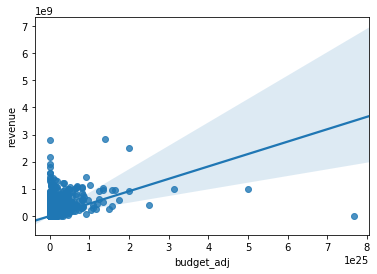

In [147]:
sns.regplot(x=(df.budget_adj**3), y=df.revenue)

In [144]:
X = pd.concat([df[['budget', 'popularity', 'vote_count', 'vote_average', 'budget_adj', 'budget_sqr']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.6218388617579358

In [94]:
scores

array([0.36964892, 0.41330585, 0.53465897, 0.58551661, 0.70728043,
       0.71577174, 0.81077367, 0.7668263 , 0.76785318, 0.72138721])

In [48]:
df.drop('diff_from_avg', axis=1, inplace=True)

### importing test data set

In [49]:
df2 = pd.read_csv('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/movies/test.csv')

In [50]:
df2.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
0,8866,2.944554,60000000,Jack Reacher,Tom Cruise|Rosamund Pike|Richard Jenkins|David...,http://www.jackreachermovie.com/,Christopher McQuarrie,The Law Has Limits. He Does Not.,based on novel|sniper|investigation|police|cha...,"In an innocent heartland city, five are shot d...",130,Crime|Drama|Thriller,Paramount Pictures|Mutual Film Company|Skydanc...,2012-12-20,2281,6.2,2012,56984656.88
1,8867,1.095339,35000000,This Is 40,Paul Rudd|Leslie Mann|Jason Segel|Maude Apatow...,http://www.thisis40movie.com/,Judd Apatow,The sort-of sequel to 'Knocked Up',family relationships|claim in title|singing in...,"Pete and Debbie are both about to turn 40, the...",134,Comedy,Apatow Productions,2012-12-20,693,5.5,2012,33241049.85
2,8868,0.158310,20000000,Not Fade Away,Bella Heathcote|Jack Huston|Dominique McElligo...,NaN,David Chase,there is no past no future either. just the Now--,new jersey|rock band|country club,"Set in suburban New Jersey in the 1960s, a gro...",112,Drama,Paramount Vantage,2012-12-21,14,5.4,2012,18994885.63
3,8869,0.055792,0,Minecraft: The Story of Mojang,Markus Persson|Jens Bergensten|Jakob Porser|Ca...,http://theminecraftmovie.com/,Paul Owens,NaN,NaN,"Follow Markus ""Notch"" Persson and his co-worke...",104,Documentary,2 Player Productions,2012-12-23,14,5.6,2012,0.00
4,8870,0.074508,0,Naughty or Nice,Hilarie Burton|Matt Dallas|Gabriel Tigerman|Da...,NaN,David Mackay,NaN,christmas,Krissy Kringle receives a delivery intended fo...,90,TV Movie,NaN,2012-12-24,10,7.1,2012,0.00


In [51]:
df2['genre'] = df2.genres.str.split('|', expand=True).loc[:,0]

In [52]:
genre_cols = df.iloc[:,18:38].columns.to_list()

In [53]:
df.iloc[:,18:38].shape

(8866, 20)

In [54]:
df2.genre.str.get_dummies()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df2 = pd.concat([df2, df2.genre.str.get_dummies()], axis=1)

In [56]:
df2.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,8866,2.944554,60000000,Jack Reacher,Tom Cruise|Rosamund Pike|Richard Jenkins|David...,http://www.jackreachermovie.com/,Christopher McQuarrie,The Law Has Limits. He Does Not.,based on novel|sniper|investigation|police|cha...,"In an innocent heartland city, five are shot d...",130,Crime|Drama|Thriller,Paramount Pictures|Mutual Film Company|Skydanc...,2012-12-20,2281,6.2,2012,56984656.88,Crime,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8867,1.095339,35000000,This Is 40,Paul Rudd|Leslie Mann|Jason Segel|Maude Apatow...,http://www.thisis40movie.com/,Judd Apatow,The sort-of sequel to 'Knocked Up',family relationships|claim in title|singing in...,"Pete and Debbie are both about to turn 40, the...",134,Comedy,Apatow Productions,2012-12-20,693,5.5,2012,33241049.85,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8868,0.158310,20000000,Not Fade Away,Bella Heathcote|Jack Huston|Dominique McElligo...,NaN,David Chase,there is no past no future either. just the Now--,new jersey|rock band|country club,"Set in suburban New Jersey in the 1960s, a gro...",112,Drama,Paramount Vantage,2012-12-21,14,5.4,2012,18994885.63,Drama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,8869,0.055792,0,Minecraft: The Story of Mojang,Markus Persson|Jens Bergensten|Jakob Porser|Ca...,http://theminecraftmovie.com/,Paul Owens,NaN,NaN,"Follow Markus ""Notch"" Persson and his co-worke...",104,Documentary,2 Player Productions,2012-12-23,14,5.6,2012,0.00,Documentary,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8870,0.074508,0,Naughty or Nice,Hilarie Burton|Matt Dallas|Gabriel Tigerman|Da...,NaN,David Mackay,NaN,christmas,Krissy Kringle receives a delivery intended fo...,90,TV Movie,NaN,2012-12-24,10,7.1,2012,0.00,TV Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
df2 = pd.concat([df2, df2.cast.str.split('|',expand=True).rename(columns={
    0:'cast_1', 1:'cast_2', 2:'cast_3', 3:'cast_4', 4:'cast_5'})], axis=1)

In [58]:
df2.cast = df2.cast.str.split('|')

In [59]:
def f(row):
    if row.cast_1 in actors[:30]:
        val = row.cast_1
    else:
        val = 'Other'
    return val

In [60]:
df2['cast_b'] = df2.apply(f, axis = 1)

In [61]:
df2.drop(['cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5'], axis=1, inplace=True)

In [62]:
df2 = pd.concat([df2, df2.cast_b.str.get_dummies()], axis=1)

In [63]:
df2.drop('cast_b', axis=1, inplace=True)

In [64]:
df2.release_date = pd.to_datetime(df2.release_date)
df2.set_index('release_date', inplace=True)

In [65]:
df2['season'] = df2.index.quarter

In [66]:
df2['season'] = df2['season'].map({
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Fall'
})

In [67]:
df2 = pd.concat([df2.drop('season', axis=1),pd.get_dummies(df2.season)], axis=1)

In [68]:
df2['prod'] = df2.production_companies.str.split('|',expand=True).loc[:,1]

In [69]:
def f(row):
    if row['prod'] in prod_companies:
        val = row['prod']
    else:
        val = 'Other'
    return val

In [70]:
df2['prod'] = df2.apply(f, axis = 1)

In [71]:
df2 = pd.concat([df2.drop('prod', axis=1),pd.get_dummies(df2['prod'])], axis=1)

In [72]:
def f(row):
    if row['director'] in directors[:15]:
        val = row['director']
    else:
        val = 'Other'
    return val

In [73]:
df2.director.isnull().value_counts()

False    1987
True       13
Name: director, dtype: int64

In [74]:
df2['director'] = df2.director.fillna('Other').copy()

In [75]:
df2['director'] = df2.apply(f, axis = 1)

In [76]:
df2 = pd.concat([df2.drop('director', axis=1),pd.get_dummies(df2['director'])], axis=1)

In [77]:
new_cols = df.iloc[:, -85:]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [78]:
new_cols2 = df2.iloc[:, -77:]
new_cols2.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Nicolas Cage,Other,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,Gore Verbinski,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-12-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-12-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-12-23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-12-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [79]:
new_cols2.shape

(2000, 77)

In [80]:
new_cols.shape

(8866, 85)

In [81]:
pd.Series(new_cols.columns.to_list())[pd.Series(new_cols.columns.to_list()).isin(pd.Series(new_cols2.columns.to_list())) == False]

9                           Foreign
30                   George Clooney
39                       Mike Myers
42                       Ray Romano
55    Columbia Pictures Corporation
56                   DreamWorks SKG
72                      David Yates
74                    James Cameron
dtype: object

In [82]:
df2['Foreign'] = 0
df2['George Clooney'] = 0
df2['Mike Myers'] = 0
df2['Ray Romano'] = 0
df2['Columbia Pictures Corporation'] = 0
df2['DreamWorks SKG'] = 0
df2['David Yates'] = 0
df2['James Cameron'] = 0

In [83]:
new_cols2 = df2.iloc[:, -85:]
new_cols2.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Nicolas Cage,Other,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,Gore Verbinski,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton,Foreign,George Clooney,Mike Myers,Ray Romano,Columbia Pictures Corporation,DreamWorks SKG,David Yates,James Cameron
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-12-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-12-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-12-23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-12-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
X = pd.concat([df[['budget', 'popularity', 'vote_count', 'vote_average', 
                   'budget_adj']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue

In [85]:
lreg = LinearRegression(n_jobs=1)


In [86]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
lreg.score(X, y)

0.646973939840439

In [88]:
X_test = pd.concat([df2[['budget', 'popularity', 'vote_count', 'vote_average', 
                   'budget_adj']], df2.loc[:, (df2.columns.isin(new_cols2))]], axis=1)

In [89]:
lreg.predict(X_test)

array([3.98044212e+08, 1.35766190e+08, 1.62888090e+07, ...,
       7.23554735e+07, 1.82394402e+07, 3.12392211e+07])

In [90]:
df2['prediction'] = lreg.predict(X_test)

In [91]:
df2.head()

,id,popularity,budget,original_title,cast,homepage,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Nicolas Cage,Other,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,Gore Verbinski,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton,Foreign,George Clooney,Mike Myers,Ray Romano,Columbia Pictures Corporation,DreamWorks SKG,David Yates,James Cameron,prediction
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-20,8866,2.944554,60000000,Jack Reacher,"[Tom Cruise, Rosamund Pike, Richard Jenkins, D...",http://www.jackreachermovie.com/,The Law Has Limits. He Does Not.,based on novel|sniper|investigation|police|cha...,"In an innocent heartland city, five are shot d...",130,Crime|Drama|Thriller,Paramount Pictures|Mutual Film Company|Skydanc...,2281,6.2,2012,56984656.88,Crime,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.980442e+08
2012-12-20,8867,1.095339,35000000,This Is 40,"[Paul Rudd, Leslie Mann, Jason Segel, Maude Ap...",http://www.thisis40movie.com/,The sort-of sequel to 'Knocked Up',family relationships|claim in title|singing in...,"Pete and Debbie are both about to turn 40, the...",134,Comedy,Apatow Productions,693,5.5,2012,33241049.85,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.357662e+08
2012-12-21,8868,0.158310,20000000,Not Fade Away,"[Bella Heathcote, Jack Huston, Dominique McEll...",NaN,there is no past no future either. just the Now--,new jersey|rock band|country club,"Set in suburban New Jersey in the 1960s, a gro...",112,Drama,Paramount Vantage,14,5.4,2012,18994885.63,Drama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.628881e+07
2012-12-23,8869,0.055792,0,Minecraft: The Story of Mojang,"[Markus Persson, Jens Bergensten, Jakob Porser...",http://theminecraftmovie.com/,NaN,NaN,"Follow Markus ""Notch"" Persson and his co-worke...",104,Documentary,2 Player Productions,14,5.6,2012,0.00,Documentary,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.138557e+07
2012-12-24,8870,0.074508,0,Naughty or Nice,"[Hilarie Burton, Matt Dallas, Gabriel Tigerman...",NaN,NaN,christmas,Krissy Kringle receives a delivery intended fo...,90,TV Movie,NaN,10,7.1,2012,0.00,TV Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.042825e+04


In [93]:
df2[['id', 'prediction']].to_csv('predictions_for_movies')

Experimenting

In [95]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [96]:
X.head()

,budget,popularity,vote_count,vote_average,budget_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,17,4.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-01-01,0,0.333643,19,6.6,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-11,0,0.194948,12,4.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-22,0,0.136525,10,6.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-03-01,0,0.267118,12,6.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [98]:
sc = StandardScaler()

In [99]:
scaled_data = sc.fit_transform(X)

In [111]:
X_std = add_constant(scaled_data)

In [121]:
mod = sm.OLS(y, X_std)

In [122]:
results = mod.fit()

In [183]:
df_test = df
df_test = df[df.budget < df.budget.quantile(0.90)]

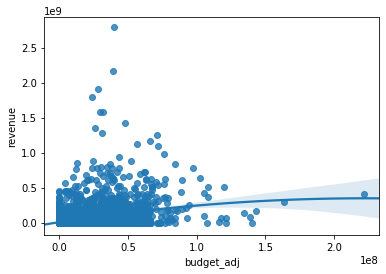

In [192]:
sns.regplot(x=df_test.budget_adj, y=df_test.revenue, order=2)

In [158]:
X.columns[85]

'Roland Emmerich'

In [124]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:24:15   Log-Likelihood:            -1.7476e+05
No. Observations:                8866   AIC:                         3.497e+05
Df Residuals:                    8779   BIC:                         3.503e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.495e+07   9.38e+05     58.561      0.0

In [208]:
df.head()

,id,popularity,budget,original_title,cast,homepage,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton,budjet_adj_2,vote_count_2,budget_2
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...",NaN,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,289,0
1960-01-01,1,0.333643,0,The Brides of Dracula,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",NaN,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,361,0
1960-02-11,2,0.194948,0,Sink the Bismarck!,"[Kenneth More, Dana Wynter, Carl MÃ¶hner, Laur...",NaN,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,144,0
1960-02-22,3,0.136525,0,Carry On Constable,"[Kenneth Connor, Charles Hawtrey, Sid James, K...",NaN,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,100,0
1960-03-01,4,0.267118,0,Comanche Station,"[Randolph Scott, Nancy Gates, Skip Homeier, Dy...",NaN,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,144,0


In [106]:
X.head()

,budget,popularity,vote_count,vote_average,budget_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe,Sam Worthington,Shia LaBeouf,Tobey Maguire,Tom Cruise,Tom Hanks,Will Smith,Fall,Spring,Summer,Winter,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Heyday Films,Jerry Bruckheimer Films,New Line Cinema,Original Film,Other,Pixar Animation Studios,Touchstone Pictures,Twentieth Century Fox Animation,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.,Carlos Saldanha,Chris Columbus,Christopher Nolan,David Yates,Gore Verbinski,James Cameron,Michael Bay,Other,Peter Jackson,Ridley Scott,Roland Emmerich,Ron Howard,Sam Raimi,Steven Soderbergh,Steven Spielberg,Tim Burton
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,17,4.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-01-01,0,0.333643,19,6.6,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-11,0,0.194948,12,4.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-02-22,0,0.136525,10,6.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1960-03-01,0,0.267118,12,6.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [237]:
new_cols = df.iloc[:, -85:-40]
new_cols.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Adam Sandler,Angelina Jolie,Ben Stiller,Bruce Willis,Christian Bale,Daniel Craig,Daniel Radcliffe,Denzel Washington,Elijah Wood,Ewan McGregor,George Clooney,Hugh Jackman,Jim Carrey,Johnny Depp,Keanu Reeves,Kristen Stewart,Leonardo DiCaprio,Mark Wahlberg,Matt Damon,Mike Myers,Nicolas Cage,Other,Ray Romano,Robert Downey Jr.,Russell Crowe
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960-02-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960-02-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [238]:
X = pd.concat([df[['budget', 'popularity', 'vote_count', 'vote_average', 'budget_adj']], df.loc[:, (df.columns.isin(new_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.6416828770471248

In [201]:
df['budget_2'] = df.budget**2

In [195]:
df['budjet_adj_2'] = df.budget_adj**2

In [196]:
df['vote_count_2'] = df.vote_count**2

In [206]:
X = df[['budget', 'popularity', 'vote_count', 'vote_average', 'budget_adj']]
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.6392985082020651

In [228]:
df.drop(['budjet_adj_2', 'vote_count_2', 'budget_2'], axis=1, inplace=True)